# Term Deposits Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d saranyaponnarasu/bank-marketing-term-deposits-classification

Dataset URL: https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification
License(s): apache-2.0
100%|█████████████████████████████████████████| 542k/542k [00:01<00:00, 402kB/s]
100%|█████████████████████████████████████████| 542k/542k [00:01<00:00, 402kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Term Deposits Classification/bank-marketing-term-deposits-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Term Deposits Classification')
zip_ref.close()

## Explaratory Data Analysis

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [27]:
df_train = pd.read_csv("Train.csv")
df_test = pd.read_csv("Test.csv")

In [28]:
df = pd.concat([df_train, df_test], axis=0)

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df.shape

(49732, 17)

In [11]:
df.size

845444

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,49732.0,40.957472,10.615008,18.0,33.0,39.0,48.0,95.0
balance,49732.0,1367.761562,3041.608766,-8019.0,72.0,448.0,1431.0,102127.0
day,49732.0,15.816315,8.315680,1.0,8.0,16.0,21.0,31.0
duration,49732.0,258.690179,257.743149,0.0,103.0,180.0,320.0,4918.0
campaign,49732.0,2.766549,3.099075,1.0,1.0,2.0,3.0,63.0
pdays,49732.0,40.158630,100.127123,-1.0,-1.0,-1.0,-1.0,871.0
previous,49732.0,0.576892,2.254838,0.0,0.0,0.0,0.0,275.0


In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(4521)

In [16]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [17]:
df['y'].value_counts()

y
no     43922
yes     5810
Name: count, dtype: int64

## Data Visualization

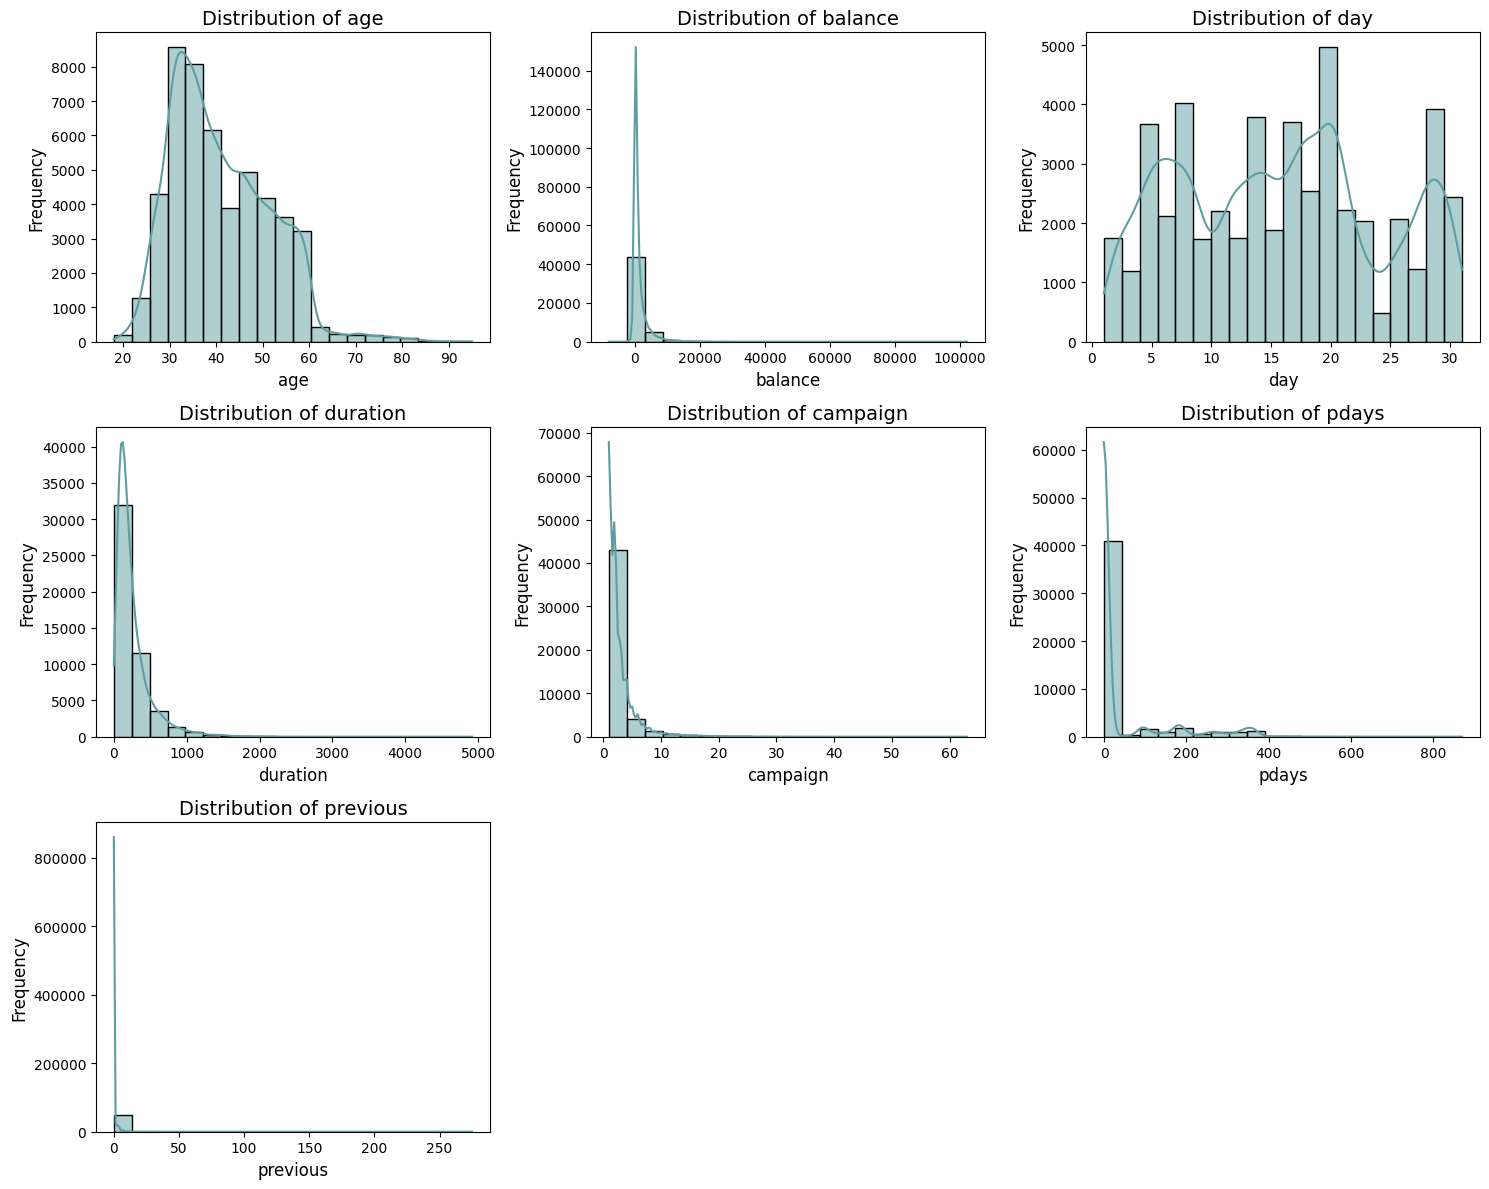

In [18]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

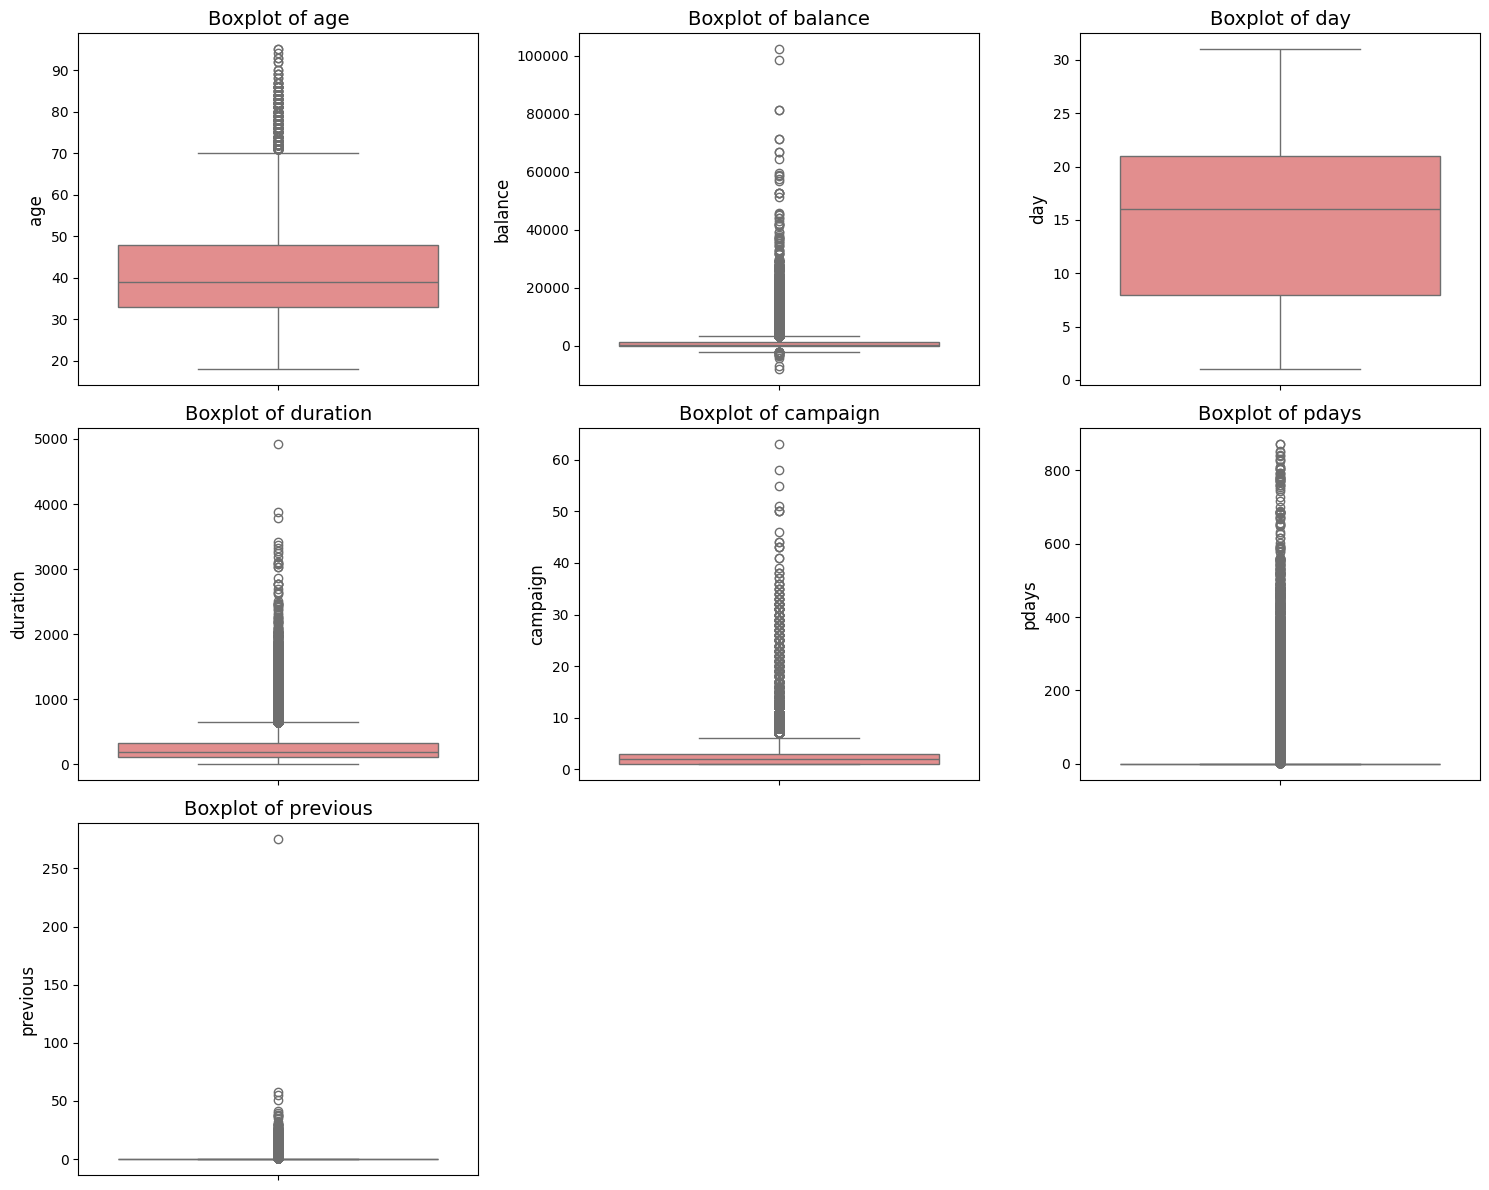

In [19]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

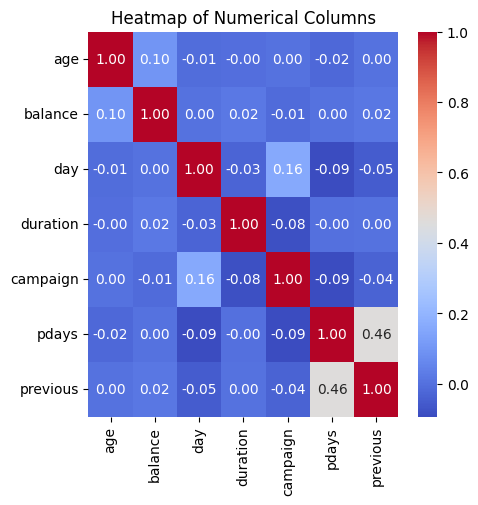

In [20]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [29]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [32]:
X = df.drop(columns=['y'])
y = df_balanced['y']

In [40]:
# Train test split

from sklearn.model_selection import train_test_split

X = df_balanced.drop(columns=['y'])
y = df_balanced['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [41]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [42]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [44]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7917383820998278, 0.7891566265060241, 0.8601549053356282, 0.8476764199655766, 0.7999139414802066, 0.8446643717728055, 0.8386402753872634, 0.7917383820998278, 0.822289156626506]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1162
           1       0.80      0.77      0.79      1162

    accuracy                           0.79      2324
   macro avg       0.79      0.79      0.79      2324
weighted avg       0.79      0.79      0.79      2324

Confusion Matrix:
 [[944 218]
 [266 896]]


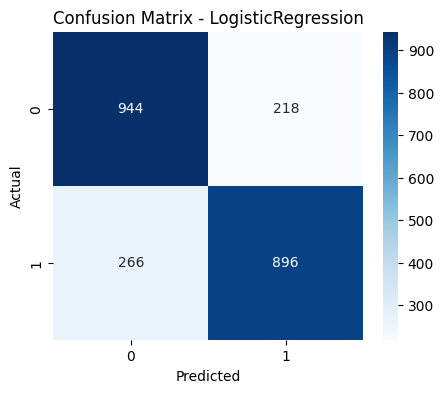

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79      1162
           1       0.80      0.76      0.78      1162

    accuracy                           0.79      2324
   macro avg       0.79      0.79      0.79      2324
weighted avg       0.79      0.79      0.79      2324

Confusion Matrix:
 [[946 216]
 [274 888]]


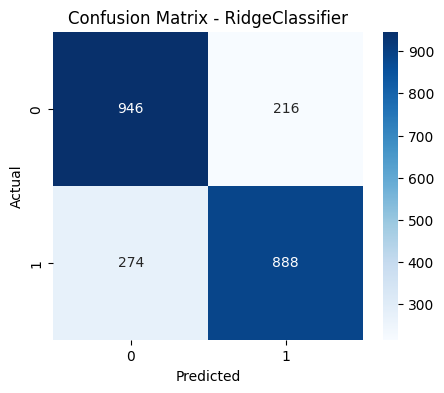

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      1162
           1       0.84      0.89      0.86      1162

    accuracy                           0.86      2324
   macro avg       0.86      0.86      0.86      2324
weighted avg       0.86      0.86      0.86      2324

Confusion Matrix:
 [[ 970  192]
 [ 133 1029]]


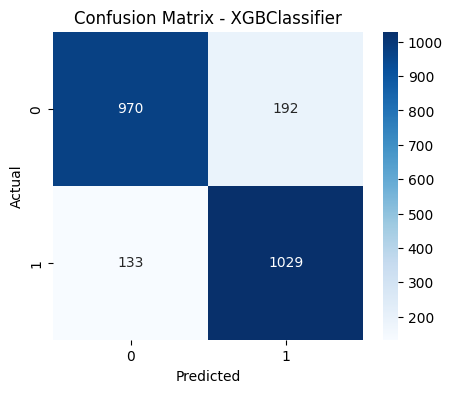

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1162
           1       0.82      0.88      0.85      1162

    accuracy                           0.85      2324
   macro avg       0.85      0.85      0.85      2324
weighted avg       0.85      0.85      0.85      2324

Confusion Matrix:
 [[ 944  218]
 [ 135 1027]]


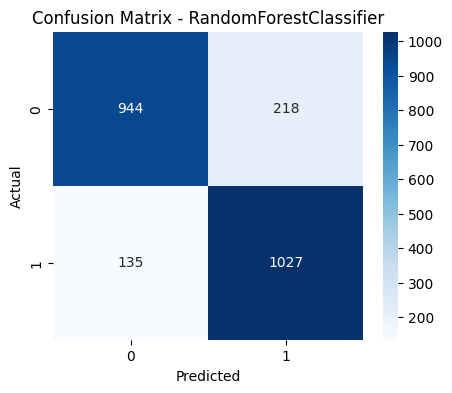

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1162
           1       0.80      0.81      0.80      1162

    accuracy                           0.80      2324
   macro avg       0.80      0.80      0.80      2324
weighted avg       0.80      0.80      0.80      2324

Confusion Matrix:
 [[921 241]
 [224 938]]


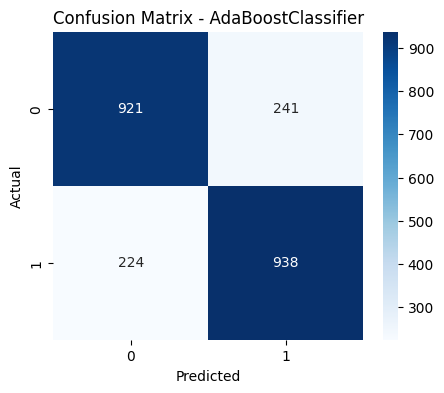

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84      1162
           1       0.83      0.87      0.85      1162

    accuracy                           0.84      2324
   macro avg       0.85      0.84      0.84      2324
weighted avg       0.85      0.84      0.84      2324

Confusion Matrix:
 [[ 950  212]
 [ 149 1013]]


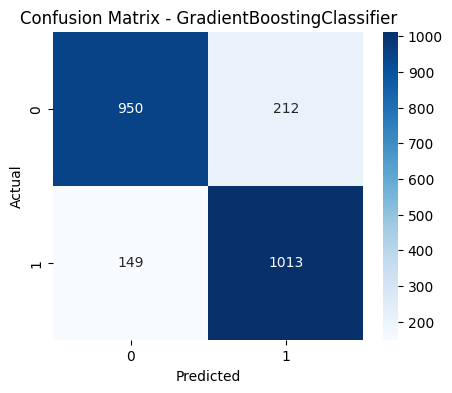

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1162
           1       0.83      0.82      0.83      1162

    accuracy                           0.83      2324
   macro avg       0.83      0.83      0.83      2324
weighted avg       0.83      0.83      0.83      2324

Confusion Matrix:
 [[971 191]
 [211 951]]


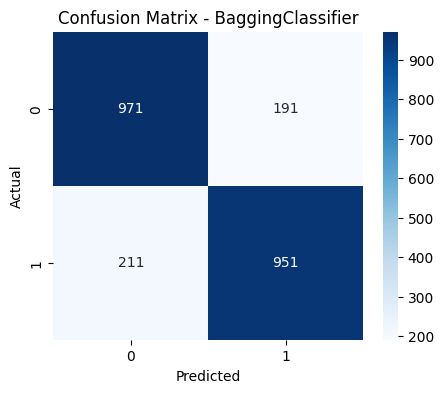

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.80      1162
           1       0.80      0.77      0.79      1162

    accuracy                           0.79      2324
   macro avg       0.79      0.79      0.79      2324
weighted avg       0.79      0.79      0.79      2324

Confusion Matrix:
 [[941 221]
 [264 898]]


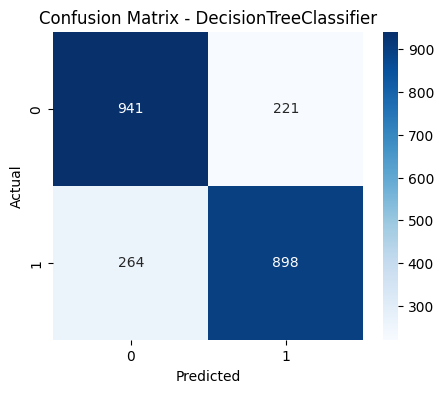

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1162
           1       0.81      0.84      0.83      1162

    accuracy                           0.82      2324
   macro avg       0.82      0.82      0.82      2324
weighted avg       0.82      0.82      0.82      2324

Confusion Matrix:
 [[932 230]
 [183 979]]


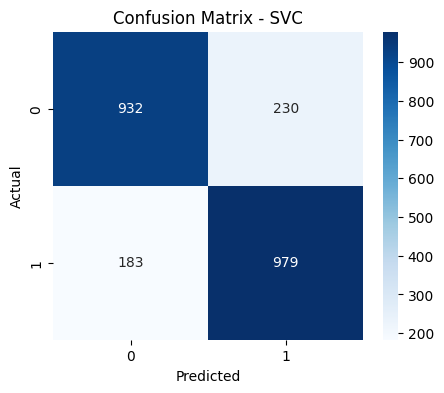

In [45]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()